# This is an example of optimization method by Ruben Charles found on LinkedIn and a repository in GitHub to estimate the rock's components fractions. 

According to Ruben, "Usually you will find this method as probabilistic, or some sort mineralogical solution name.

This is a very bare bone approach with the only intend of testing capabilites of #python, #scipy, #matplotlib and i invite you to check the notebook and play whith it."

We have found this notebook to be quite interesting and useful. 

Jupyter notebook:
https://github.com/ruben-charles/petrophysical_evaluation_optimization_methods/blob/70eae4e8825ae0540351289506ba84be0c20f3a3/petrophysical_evaluation_optimization_methods.ipynb

## Import libraries:

In [1]:
import lasio
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

#plt.style.use("bmh")
plt.style.use("ggplot")


## Read LAS and make a dataframe of a set interval#

In [2]:
lasfile = lasio.read("36_7-3.las")

logs = lasfile.df()

logs.reset_index(inplace=True)

logs = logs.loc[(logs["DEPT"] >= 2500)  & (logs["DEPT"] <= 2700)].reset_index()


In [3]:
logs.describe()

,index,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,PEF,GR,DTC,RDEP,RMED
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000
mean,1371.000000,2599.992646,7.038842,7.599500,2.460529,0.272810,2.460529,2.460529,91.430848,96.417856,4.166256,4.129497
std,379.174762,57.786237,4.178836,0.000003,0.121053,0.038617,0.121053,0.121053,26.448164,8.041995,3.404666,3.401247
min,715.000000,2500.018311,2.000000,7.599400,2.190156,0.099500,2.190156,2.190156,50.943001,68.603821,0.751170,0.836115
25%,1043.000000,2550.005371,4.000000,7.599500,2.359016,0.252204,2.359016,2.359016,67.386902,90.654999,2.207200,2.173718
50%,1371.000000,2599.992676,6.000000,7.599500,2.487900,0.273400,2.487900,2.487900,86.939102,97.842003,3.248400,3.135000
75%,1699.000000,2649.979980,13.000000,7.599500,2.545200,0.294805,2.545200,2.545200,116.533318,102.133896,5.036400,5.067900
max,2027.000000,2699.967041,16.000000,7.599500,2.866500,0.390796,2.866500,2.866500,143.535584,119.438560,30.409100,31.963423


## Read the table containing the components log responses and make a dictionary of responses:

In [4]:
responses_table = pd.read_excel("log_responses.xlsx", index_col=0)

response_dict = responses_table.to_dict(orient="dict")

responses ={}
for i in response_dict:
    for j in response_dict[i]:
        responses[(j + "_" + i)] = response_dict[i][j]



print(responses_table.head())
print()
responses

      QUARTZ  CALCITE  DOLOMITE     SH    MUD
LOG                                          
GR     40.00     0.00     0.000  160.0    0.0
NPHI   -0.04     0.00     0.009    0.3    1.0
RHOB    2.65     2.71     2.870    2.5    1.3
DTC    55.00    47.60    43.500  110.0  180.0
PEF     1.80     5.08     3.140    2.2    0.0



{'GR_QUARTZ': 40.0,
 'NPHI_QUARTZ': -0.04,
 'RHOB_QUARTZ': 2.65,
 'DTC_QUARTZ': 55.0,
 'PEF_QUARTZ': 1.8,
 'GR_CALCITE': 0.0,
 'NPHI_CALCITE': 0.0,
 'RHOB_CALCITE': 2.71,
 'DTC_CALCITE': 47.6,
 'PEF_CALCITE': 5.08,
 'GR_DOLOMITE': 0.0,
 'NPHI_DOLOMITE': 0.009,
 'RHOB_DOLOMITE': 2.87,
 'DTC_DOLOMITE': 43.5,
 'PEF_DOLOMITE': 3.14,
 'GR_SH': 160.0,
 'NPHI_SH': 0.3,
 'RHOB_SH': 2.5,
 'DTC_SH': 110.0,
 'PEF_SH': 2.2,
 'GR_MUD': 0.0,
 'NPHI_MUD': 1.0,
 'RHOB_MUD': 1.3,
 'DTC_MUD': 180.0,
 'PEF_MUD': 0.0}

In [5]:
import panel as pn
pn.extension()

pn.pane.DataFrame(responses_table)

DataFrame(DataFrame)

### Just a starting an starting point of volumen fraction

In [6]:
VOL_QUARTZ    = 0.2
VOL_CALCITE   = 0.2
VOL_DOLOMITE  = 0.2
VOL_SH        = 0.2
VOL_MUD       = 0.2

### This is the placeholder of the model recontructed logs

In [7]:
logs["GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
logs["NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
logs["RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
logs["DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
logs["PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]
logs['Error']      = 1

## Start optimization:

In [8]:
from scipy.optimize import minimize

### The objective function to minimize the error of reconstructed logs

In [9]:
def error_recon(volumes, *args):

    VOL_QUARTZ, VOL_CALCITE, VOL_DOLOMITE, VOL_SH, VOL_MUD = volumes

    GR, NPHI, RHOB, DTC, PEF = args

    GR_RECON   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    NPHI_RECON = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    RHOB_RECON = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    DTC_RECON  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    PEF_RECON  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]


    #Some magic numbers to adjust the precision of differents magnitude orders (needs improvement)
    return (GR-GR_RECON)**2 + (NPHI*300- NPHI_RECON*300)**2 + (RHOB*100 - 100*RHOB_RECON)**2 + (DTC - DTC_RECON)**2 + (PEF -PEF_RECON)**2


### Set the volumn bounds

In [10]:
#Mineral volumen bounds
bnds = ((0, 1), (0, 1), (0, 0.1), (0, 1), (0, 0.45))


### A constraint to make the sum of volumes total equal 1

In [11]:
def constraint1(x):
    return x[0]+x[1]+x[2]+x[3]+x[4]-1

cons = [{"type": "eq", "fun": constraint1}]


### Here we calculate the volumen at each depth (row) calling the optimization object and create the volumen logs and recontructed inputs logs

In [12]:
for i in range(len(logs)):

    res = minimize(error_recon, ((0, 0, 0, 0, 0)), args=(logs.loc[i, "GR"], logs.loc[i, "NPHI"], logs.loc[i, "RHOB"], logs.loc[i, "DTC"], logs.loc[i, "PEF"]), bounds= bnds, constraints=cons)

    VOL_QUARTZ    = res.x[0]
    VOL_CALCITE   = res.x[1]
    VOL_DOLOMITE  = res.x[2]
    VOL_SH        = res.x[3]
    VOL_MUD       = res.x[4]
    
    logs.loc[i, "GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    logs.loc[i, "NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    logs.loc[i, "RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    logs.loc[i, "DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    logs.loc[i, "PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]

    logs.loc[i, "VOL_QUARTZ"]  = VOL_QUARTZ
    logs.loc[i, "VOL_CALCITE"] = VOL_CALCITE
    logs.loc[i, "VOL_DOLOMITE"]= VOL_DOLOMITE
    logs.loc[i, "VOL_SH"]      = VOL_SH
    logs.loc[i, "VOL_MUD"]     = VOL_MUD
    
    
    rhob_norm = (logs.loc[i,"RHOB"] - 1.9)/(3.0 - 1.9)
    rhob_norm_theo = (logs.loc[i, "RHOB_RECON"] - 1.9)/(3.0 - 1.9)
    tnph_norm = ((logs.loc[i,"NPHI"] - (-0.05))/(0.6 - (-0.05)))
    tnph_norm_theo = (logs.loc[i, "NPHI_RECON"] - (-0.05))/(0.6 - (-0.05))    
    gr_norm = ( logs.loc[i, "GR"] -  0)/(200 - 0)
    gr_norm_theo = (logs.loc[i, "GR_RECON"] - 0)/(200 - 0)    
    pef_norm = ( logs.loc[i, "PEF"] -  1)/(6 - 1)
    pef_norm_theo = (logs.loc[i, "PEF_RECON"] - 1)/(6 - 1)    
    dtc_norm = ( logs.loc[i, "DTC"] -  40)/(140 - 40)
    dtc_norm_theo = (logs.loc[i, "DTC_RECON"] - 40)/(140 - 40)    


    #logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(pef_norm-pef_nor+(dtc_norm-dtc_norm_theo)))
    # Removed PEF because it is the same as RHOB and probably only there as a place holer for PEF
    logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(dtc_norm-dtc_norm_theo)))

    
print(logs['Error'].describe())    

/Users/craig/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


count    1313.000000
mean        0.018238
std         0.015977
min         0.000017
25%         0.006421
50%         0.014077
75%         0.025786
max         0.132464
Name: Error, dtype: float64


## The plotting section:

We have partitioned the lithology components into a Lithology plot with pattern fills as originally presented by Andy McDonald.

In [13]:
def Plot():
    
    fig = plt.figure(figsize=(20, 10))

    ax =[]

    ax.append(fig.add_subplot(1, 9, (1, 1)))
    ax.append(fig.add_subplot(1, 9, (2, 2), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (3, 3), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (4, 4), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (5, 5), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (6, 6), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (7, 7), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (8, 8), sharey=ax[0]))
    ax.append(fig.add_subplot(1, 9, (9, 9), sharey=ax[0]))


    ax[0].yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(10))
    ax[0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(5))
    ax[0].invert_yaxis()
    ax[0].plot(logs["GR"], logs["DEPT"], color="green")
    ax[0].set_xlabel("GR [°API]", color="green")
    ax[0].tick_params(which="both", top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[0].xaxis.set_label_position("top")
    ax[0].set_xlim(0, 200)
    ax[0].grid(True, which="both")


    t1 = ax[1].twiny()
    t1.plot(logs["RHOB"], logs["DEPT"], color="blue")
    t1.set_xlabel("RHOB [g/cc]", color ="blue")
    t1.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    t1.xaxis.set_label_position("top")

    t1.spines.top.set_position(("axes",1.1))
    t1.set_xlim(1.95, 2.95)


    #t2 = ax[1].twiny()
    #t2.plot(logs["DTC"], logs["DEPT"], color="green")
    #t2.set_xlabel("DTC [us/ft]")
    #t2.tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #t2.xaxis.set_label_position("top")

    #t2.spines.top.set_position(("axes",1.06))
    #t2.set_xlim(140, 40)

    ax[1].plot(logs["NPHI"], logs["DEPT"], color="red")
    ax[1].set_xlabel("NPHI [v/v]", color="red")
    ax[1].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[1].xaxis.set_label_position("top")
    ax[1].set_xlim(0.45, -0.05)
    ax[1].grid(True, which="both")

    ax[2].semilogx(logs["RDEP"], logs["DEPT"], color="black")
    ax[2].set_xlabel("RDEP [ohm*m]")
    ax[2].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[2].xaxis.set_label_position("top")
    ax[2].set_xlim(1, 100)
    ax[2].grid(True, which="both")


    ax[3].plot(logs["GR"], logs["DEPT"], "--", color="black")
    ax[3].plot(logs["GR_RECON"], logs["DEPT"], "-", color="red")
    ax[3].set_xlim(0, 200)
    ax[3].set_xlabel("GR [°API]\n recon", color ="red")
    ax[3].xaxis.set_label_position("top")
    ax[3].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)

    ax[4].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[4].set_xlabel("NPHI [v/v]\n recon", color ="red")
    ax[4].xaxis.set_label_position("top")
    ax[4].plot(logs["NPHI"], logs["DEPT"], "--", color="black")
    ax[4].plot(logs["NPHI_RECON"], logs["DEPT"], "-", color="red")
    ax[4].set_xlim(0.45, -0.05)


    ax[5].set_xlabel("RHOB [g/cc]\n recon", color ="red")
    ax[5].xaxis.set_label_position("top")
    ax[5].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[5].plot(logs["RHOB"], logs["DEPT"], "--", color="black")
    ax[5].plot(logs["RHOB_RECON"], logs["DEPT"], "-", color="red")
    ax[5].set_xlim(1.95, 2.95)


    ax[6].set_xlabel("DTC [us/ft]\n recon", color ="red")
    ax[6].xaxis.set_label_position("top")
    ax[6].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[6].plot(logs["DTC"], logs["DEPT"], "--", color="black")
    ax[6].plot(logs["DTC_RECON"], logs["DEPT"], "-", color="red")
    ax[6].set_xlim(140, 40)

    #ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    #ax[7].plot(logs["PEF"], logs["DEPT"], "--", color="black")
    #ax[7].plot(logs["PEF_RECON"], logs["DEPT"], "-", color="red")
    #ax[7].set_xlim(0, 5)


    ax[7].set_xlabel("VOL_SH [v/v]")
    ax[7].xaxis.set_label_position("top")
    ax[7].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[7].plot(logs["VOL_SH"]                                                             , logs["DEPT"], color="gray",  linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']                                          , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                      , logs["DEPT"], color="black", linewidth=0)
    ax[7].plot(logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] , logs["DEPT"], color="black", linewidth=0)

    ax[7].set_xlim(0, 1)
    ax[7].fill_betweenx(logs["DEPT"], 0.0                                                  , logs["VOL_SH"]                                                            , facecolor='#d1d1d1' , hatch='-.-.',label= 'VOL_SH')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]                                       , logs["VOL_SH"]+logs['VOL_QUARTZ']                                         , facecolor='#ffff00' ,hatch='..',label='VOL_QUARTZ')
    ax[7].fill_betweenx(logs["DEPT"], logs["VOL_SH"]+logs['VOL_QUARTZ']                    , logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']                     , facecolor='#00ffff' ,hatch='|-|-',label='VOL_CALCITE')
    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'], facecolor='#00ff00' ,hatch='/-/-',label='VOL_DOLOMITE')

    ax[7].fill_betweenx(logs['DEPT'], logs["VOL_SH"]+logs['VOL_QUARTZ']+logs['VOL_CALCITE']+logs['VOL_DOLOMITE'] ,1, color="black")
    ax[7].legend(loc='upper left')


    #ax[7].fill_betweenx(logs["DEPT"], 0.5, logs["VOL_SH"], where=logs["VO L_SH"]>0.5, color="gray", alpha=0.5)

    ax[8].set_xlabel("PHIT [v/v]")
    ax[8].xaxis.set_label_position("top")
    ax[8].tick_params(labelleft=False, top=True, labeltop=True, bottom=False, labelbottom=False)
    ax[8].plot(logs["VOL_MUD"], logs["DEPT"], "-", color="black")
    ax[8].set_xlim(0.5, 0.)
    #ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="green", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["VOL_MUD"], color="cyan", alpha=1, label = "PHIT")
    ax[8].fill_betweenx(logs["DEPT"], 0.12, logs["VOL_MUD"], where=logs["VOL_MUD"]>0.12, color="olive", alpha=1, label = "Net Res")  
    ax[8].plot(logs["Error"], logs["DEPT"], color="red")
    ax[8].fill_betweenx(logs["DEPT"], 0.0, logs["Error"], color="red", alpha=1.0, label = "Error")
    ax[8].legend(loc='upper left')

    fig.tight_layout()
    fig.savefig("fig1.png", bbox_inches="tight")


    plt.show()

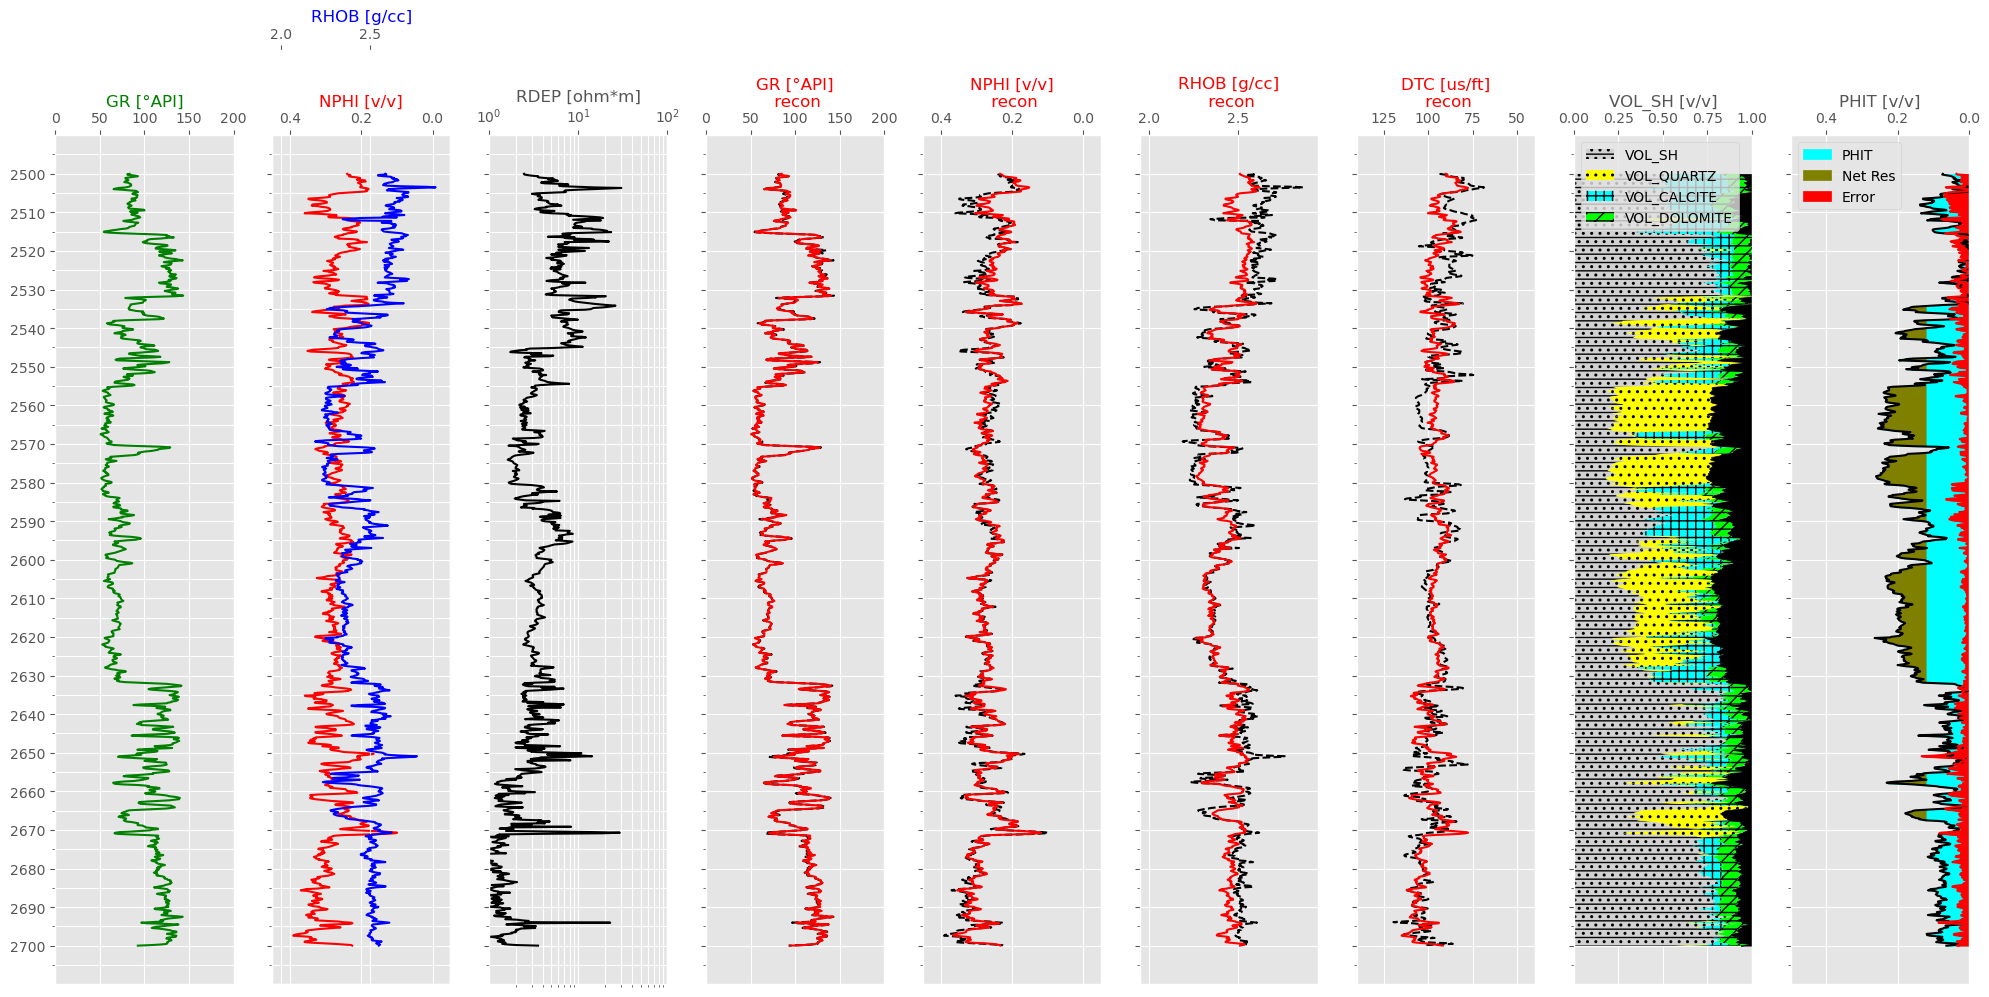

In [14]:
Plot()

## Experiment with all Magic Numbers equal to 1: 

In [15]:
def error_recon(volumes, *args):

    VOL_QUARTZ, VOL_CALCITE, VOL_DOLOMITE, VOL_SH, VOL_MUD = volumes

    GR, NPHI, RHOB, DTC, PEF = args

    GR_RECON   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    NPHI_RECON = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    RHOB_RECON = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    DTC_RECON  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    PEF_RECON  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]


    #Some magic numbers to adjust the precision of differents magnitude orders (needs improvement)
    #return (GR-GR_RECON)**2 + (NPHI*300- NPHI_RECON*300)**2 + (RHOB*100 - 100*RHOB_RECON)**2 + (DTC - DTC_RECON)**2 + (PEF -PEF_RECON)**2
    return (GR-GR_RECON)**2 + (NPHI*1- NPHI_RECON*1)**2 + (RHOB*1 - 1*RHOB_RECON)**2 + (DTC - DTC_RECON)**2 + (PEF -PEF_RECON)**2


In [16]:
for i in range(len(logs)):

    res = minimize(error_recon, ((0, 0, 0, 0, 0)), args=(logs.loc[i, "GR"], logs.loc[i, "NPHI"], logs.loc[i, "RHOB"], logs.loc[i, "DTC"], logs.loc[i, "PEF"]), bounds= bnds, constraints=cons)

    VOL_QUARTZ    = res.x[0]
    VOL_CALCITE   = res.x[1]
    VOL_DOLOMITE  = res.x[2]
    VOL_SH        = res.x[3]
    VOL_MUD       = res.x[4]
    
    logs.loc[i, "GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    logs.loc[i, "NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    logs.loc[i, "RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    logs.loc[i, "DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    logs.loc[i, "PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]

    logs.loc[i, "VOL_QUARTZ"]  = VOL_QUARTZ
    logs.loc[i, "VOL_CALCITE"] = VOL_CALCITE
    logs.loc[i, "VOL_DOLOMITE"]= VOL_DOLOMITE
    logs.loc[i, "VOL_SH"]      = VOL_SH
    logs.loc[i, "VOL_MUD"]     = VOL_MUD
    
    
    rhob_norm = (logs.loc[i,"RHOB"] - 1.9)/(3.0 - 1.9)
    rhob_norm_theo = (logs.loc[i, "RHOB_RECON"] - 1.9)/(3.0 - 1.9)
    tnph_norm = ((logs.loc[i,"NPHI"] - (-0.05))/(0.6 - (-0.05)))
    tnph_norm_theo = (logs.loc[i, "NPHI_RECON"] - (-0.05))/(0.6 - (-0.05))    
    gr_norm = ( logs.loc[i, "GR"] -  0)/(200 - 0)
    gr_norm_theo = (logs.loc[i, "GR_RECON"] - 0)/(200 - 0)    
    pef_norm = ( logs.loc[i, "PEF"] -  1)/(6 - 1)
    pef_norm_theo = (logs.loc[i, "PEF_RECON"] - 1)/(6 - 1)    
    dtc_norm = ( logs.loc[i, "DTC"] -  40)/(140 - 40)
    dtc_norm_theo = (logs.loc[i, "DTC_RECON"] - 40)/(140 - 40)    


    #logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(pef_norm-pef_nor+(dtc_norm-dtc_norm_theo)))
    # Removed PEF because it is the same as RHOB and probably only there as a place holer for PEF
    logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(dtc_norm-dtc_norm_theo)))

    
print(logs['Error'].describe())    

/Users/craig/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


count    1313.000000
mean        0.027922
std         0.021026
min         0.000047
25%         0.011669
50%         0.024151
75%         0.039783
max         0.140595
Name: Error, dtype: float64


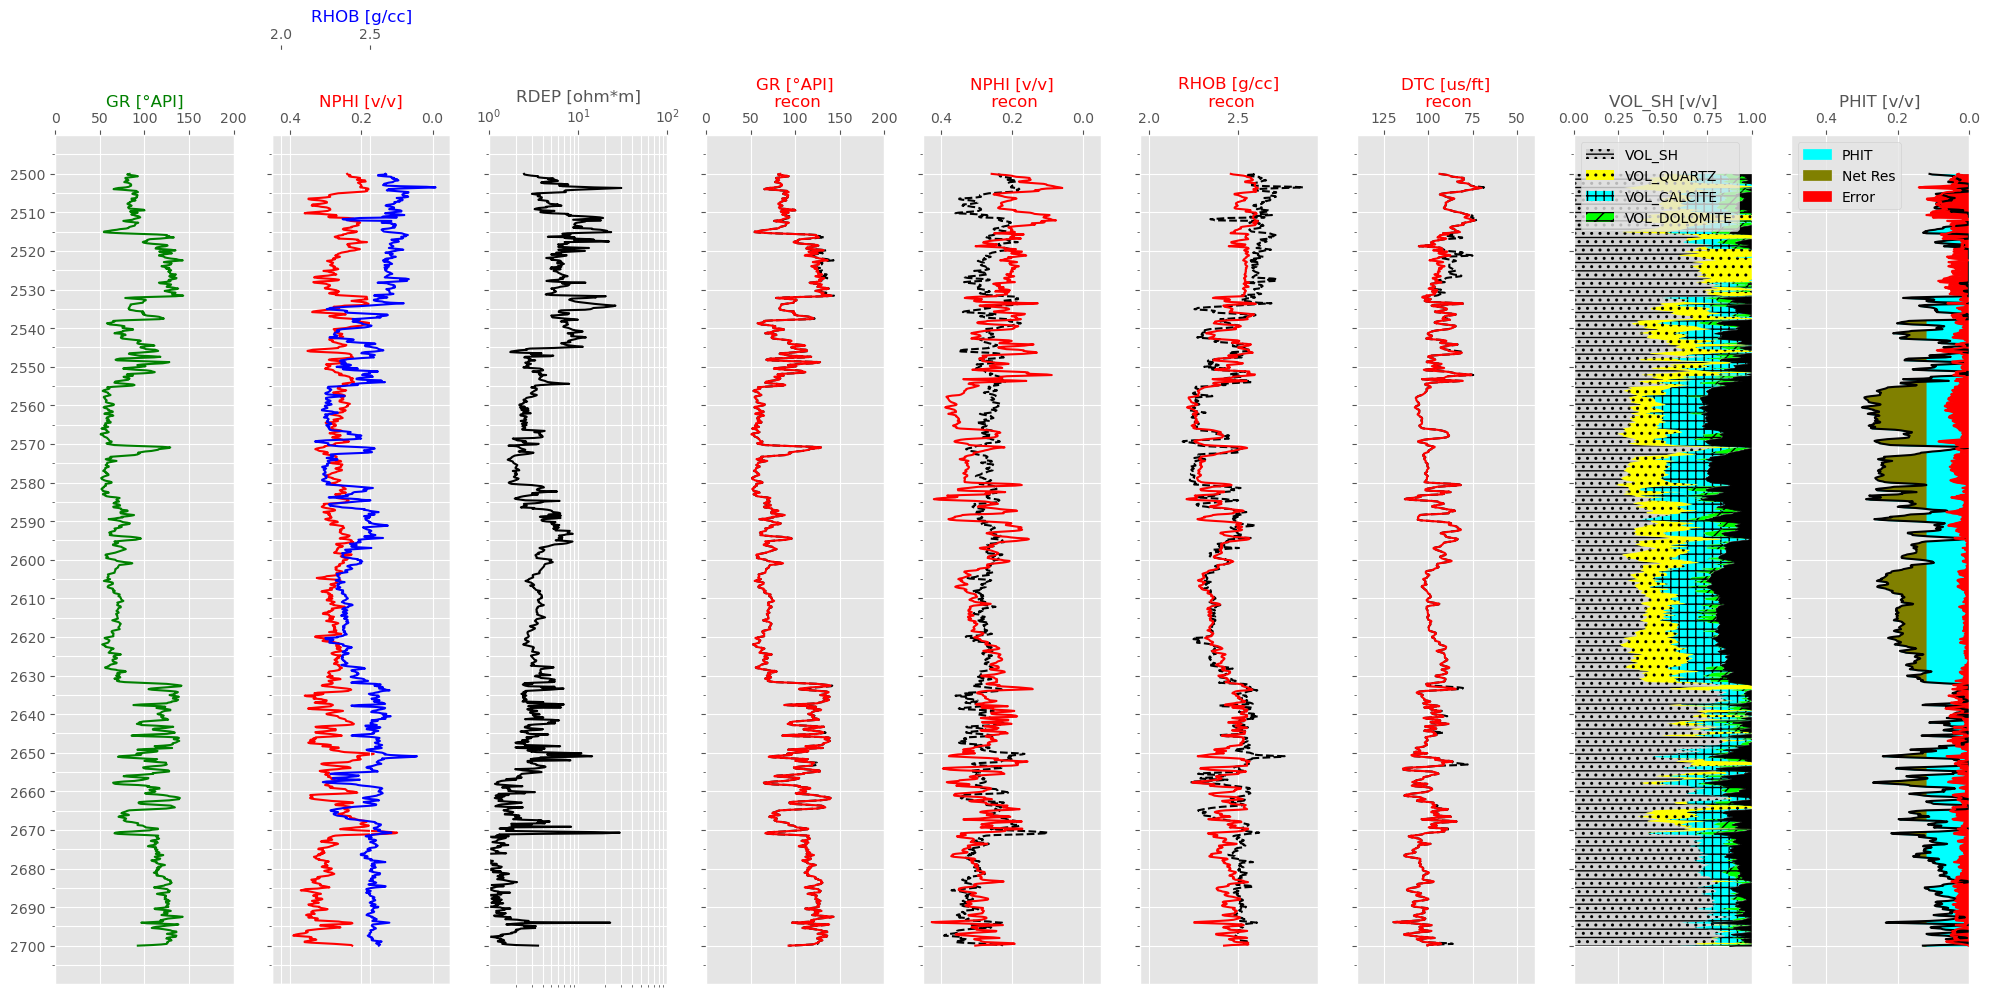

In [17]:
Plot()

## Experiment with calculating the Magic Numbers: 
Magic Number for NPHI is (mean of GR)/(mean of NPHI)
.
.
.


In [18]:
logs.describe()

,index,DEPT,LITHOLOGY_GEOLINK,CALI,DRHO,NPHI,RHOB,PEF,GR,DTC,...,NPHI_RECON,RHOB_RECON,DTC_RECON,PEF_RECON,Error,VOL_QUARTZ,VOL_CALCITE,VOL_DOLOMITE,VOL_SH,VOL_MUD
count,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,...,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1313.000000,1.313000e+03,1313.000000,1313.000000
mean,1371.000000,2599.992646,7.038842,7.599500,2.460529,0.272810,2.460529,2.460529,91.430848,96.417856,...,0.268073,2.433514,96.913462,2.390927,0.027922,0.154402,0.163339,3.634257e-02,0.531422,0.114495
std,379.174762,57.786237,4.178836,0.000003,0.121053,0.038617,0.121053,0.121053,26.448164,8.041995,...,0.061857,0.094741,7.543715,0.158679,0.021026,0.127670,0.070249,4.372399e-02,0.177820,0.084601
min,715.000000,2500.018311,2.000000,7.599400,2.190156,0.099500,2.190156,2.190156,50.943001,68.603821,...,0.059247,2.211536,69.980812,1.924682,0.000047,0.000000,0.000000,0.000000e+00,0.237262,0.000000
25%,1043.000000,2550.005371,4.000000,7.599500,2.359016,0.252204,2.359016,2.359016,67.386902,90.654999,...,0.227264,2.361145,91.761298,2.294417,0.011669,0.013507,0.131420,2.913793e-19,0.370814,0.039779
50%,1371.000000,2599.992676,6.000000,7.599500,2.487900,0.273400,2.487900,2.487900,86.939102,97.842003,...,0.272096,2.439143,97.955283,2.397883,0.024151,0.160260,0.179459,3.984116e-06,0.494851,0.105697
75%,1699.000000,2649.979980,13.000000,7.599500,2.545200,0.294805,2.545200,2.545200,116.533318,102.133896,...,0.314455,2.516917,102.132127,2.513282,0.039783,0.240098,0.214633,9.984198e-02,0.707282,0.183268
max,2027.000000,2699.967041,16.000000,7.599500,2.866500,0.390796,2.866500,2.866500,143.535584,119.438560,...,0.425475,2.612226,119.411523,2.728121,0.140595,0.688296,0.344567,1.000000e-01,0.893321,0.300171


In [19]:
import numpy as np


mean_GR = np.mean(logs["GR"])
mean_GR

mean_NPHI = np.mean(logs["NPHI"])
mean_NPHI

mean_RHOB = np.mean(logs["RHOB"])
mean_RHOB

mean_PEF = np.mean(logs["PEF"])
mean_PEF

mean_DTC = np.mean(logs["DTC"])
mean_DTC

print("Mean GR =",mean_GR, ", Mean NPHI =", mean_NPHI,  ", Mean RHOB =",mean_RHOB,  ", Mean PEF =",mean_PEF,  ", Mean DTC =",mean_DTC)
print()
print("Magic Numbers: NPHI =",mean_GR/mean_NPHI, ", RHOB =",mean_GR/mean_RHOB, ", PEF =",mean_GR/mean_PEF, ", DTC =",mean_GR/mean_DTC)


Mean GR = 91.43084799020487 , Mean NPHI = 0.27281011978225433 , Mean RHOB = 2.460529158520868 , Mean PEF = 2.460529157249657 , Mean DTC = 96.41785553506017

Magic Numbers: NPHI = 335.14463489543994 , RHOB = 37.159018284167765 , PEF = 37.15901830336565 , DTC = 0.9482771368728286


In [20]:
def error_recon(volumes, *args):

    VOL_QUARTZ, VOL_CALCITE, VOL_DOLOMITE, VOL_SH, VOL_MUD = volumes

    GR, NPHI, RHOB, DTC, PEF = args

    GR_RECON   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    NPHI_RECON = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    RHOB_RECON = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    DTC_RECON  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    PEF_RECON  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]


    #Some magic numbers to adjust the precision of differents magnitude orders (needs improvement)
    #return (GR-GR_RECON)**2 + (NPHI*300- NPHI_RECON*300)**2 + (RHOB*100 - 100*RHOB_RECON)**2 + (DTC - DTC_RECON)**2 + (PEF -PEF_RECON)**2
    return (GR-GR_RECON)**2  + (NPHI*(mean_GR/mean_NPHI)- NPHI_RECON*(mean_GR/mean_NPHI))**2 + (RHOB*(mean_GR/mean_RHOB) - (mean_GR/mean_RHOB)*RHOB_RECON)**2 + (DTC*(mean_GR/mean_DTC) - (mean_GR/mean_DTC)*DTC_RECON)**2 + (PEF*(mean_GR/mean_PEF) - (mean_GR/mean_PEF)*PEF_RECON)**2


In [21]:
for i in range(len(logs)):

    res = minimize(error_recon, ((0, 0, 0, 0, 0)), args=(logs.loc[i, "GR"], logs.loc[i, "NPHI"], logs.loc[i, "RHOB"], logs.loc[i, "DTC"], logs.loc[i, "PEF"]), bounds= bnds, constraints=cons)

    VOL_QUARTZ    = res.x[0]
    VOL_CALCITE   = res.x[1]
    VOL_DOLOMITE  = res.x[2]
    VOL_SH        = res.x[3]
    VOL_MUD       = res.x[4]
    
    logs.loc[i, "GR_RECON"]   = VOL_QUARTZ*responses["GR_QUARTZ"]   + VOL_CALCITE*responses["GR_CALCITE"]   +VOL_DOLOMITE*responses["GR_DOLOMITE"]   +VOL_SH*responses["GR_SH"]   +VOL_MUD*responses["GR_MUD"]
    logs.loc[i, "NPHI_RECON"] = VOL_QUARTZ*responses["NPHI_QUARTZ"] + VOL_CALCITE*responses["NPHI_CALCITE"] +VOL_DOLOMITE*responses["NPHI_DOLOMITE"] +VOL_SH*responses["NPHI_SH"] +VOL_MUD*responses["NPHI_MUD"]
    logs.loc[i, "RHOB_RECON"] = VOL_QUARTZ*responses["RHOB_QUARTZ"] + VOL_CALCITE*responses["RHOB_CALCITE"] +VOL_DOLOMITE*responses["RHOB_DOLOMITE"] +VOL_SH*responses["RHOB_SH"] +VOL_MUD*responses["RHOB_MUD"]
    logs.loc[i, "DTC_RECON"]  = VOL_QUARTZ*responses["DTC_QUARTZ"]  + VOL_CALCITE*responses["DTC_CALCITE"]  +VOL_DOLOMITE*responses["DTC_DOLOMITE"]  +VOL_SH*responses["DTC_SH"]  +VOL_MUD*responses["DTC_MUD"]
    logs.loc[i, "PEF_RECON"]  = VOL_QUARTZ*responses["PEF_QUARTZ"]  + VOL_CALCITE*responses["PEF_CALCITE"]  +VOL_DOLOMITE*responses["PEF_DOLOMITE"]  +VOL_SH*responses["PEF_SH"]  +VOL_MUD*responses["PEF_MUD"]

    logs.loc[i, "VOL_QUARTZ"]  = VOL_QUARTZ
    logs.loc[i, "VOL_CALCITE"] = VOL_CALCITE
    logs.loc[i, "VOL_DOLOMITE"]= VOL_DOLOMITE
    logs.loc[i, "VOL_SH"]      = VOL_SH
    logs.loc[i, "VOL_MUD"]     = VOL_MUD
    
    
    rhob_norm = (logs.loc[i,"RHOB"] - 1.9)/(3.0 - 1.9)
    rhob_norm_theo = (logs.loc[i, "RHOB_RECON"] - 1.9)/(3.0 - 1.9)
    tnph_norm = ((logs.loc[i,"NPHI"] - (-0.05))/(0.6 - (-0.05)))
    tnph_norm_theo = (logs.loc[i, "NPHI_RECON"] - (-0.05))/(0.6 - (-0.05))    
    gr_norm = ( logs.loc[i, "GR"] -  0)/(200 - 0)
    gr_norm_theo = (logs.loc[i, "GR_RECON"] - 0)/(200 - 0)    
    pef_norm = ( logs.loc[i, "PEF"] -  1)/(6 - 1)
    pef_norm_theo = (logs.loc[i, "PEF_RECON"] - 1)/(6 - 1)    
    dtc_norm = ( logs.loc[i, "DTC"] -  40)/(140 - 40)
    dtc_norm_theo = (logs.loc[i, "DTC_RECON"] - 40)/(140 - 40)    


    #logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(pef_norm-pef_nor+(dtc_norm-dtc_norm_theo)))
    # Removed PEF because it is the same as RHOB and probably only there as a place holer for PEF
    logs.loc[i, "Error"] = (0.333*abs((rhob_norm-rhob_norm_theo)+(tnph_norm-tnph_norm_theo)+(gr_norm-gr_norm_theo)+(dtc_norm-dtc_norm_theo)))

    
print(logs['Error'].describe())    

/Users/craig/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/_optimize.py:284: RuntimeWarning: Values in x were outside bounds during a minimize step, clipping to bounds
  warnings.warn("Values in x were outside bounds during a "


count    1313.000000
mean        0.020442
std         0.017151
min         0.000007
25%         0.007484
50%         0.016650
75%         0.028866
max         0.140526
Name: Error, dtype: float64


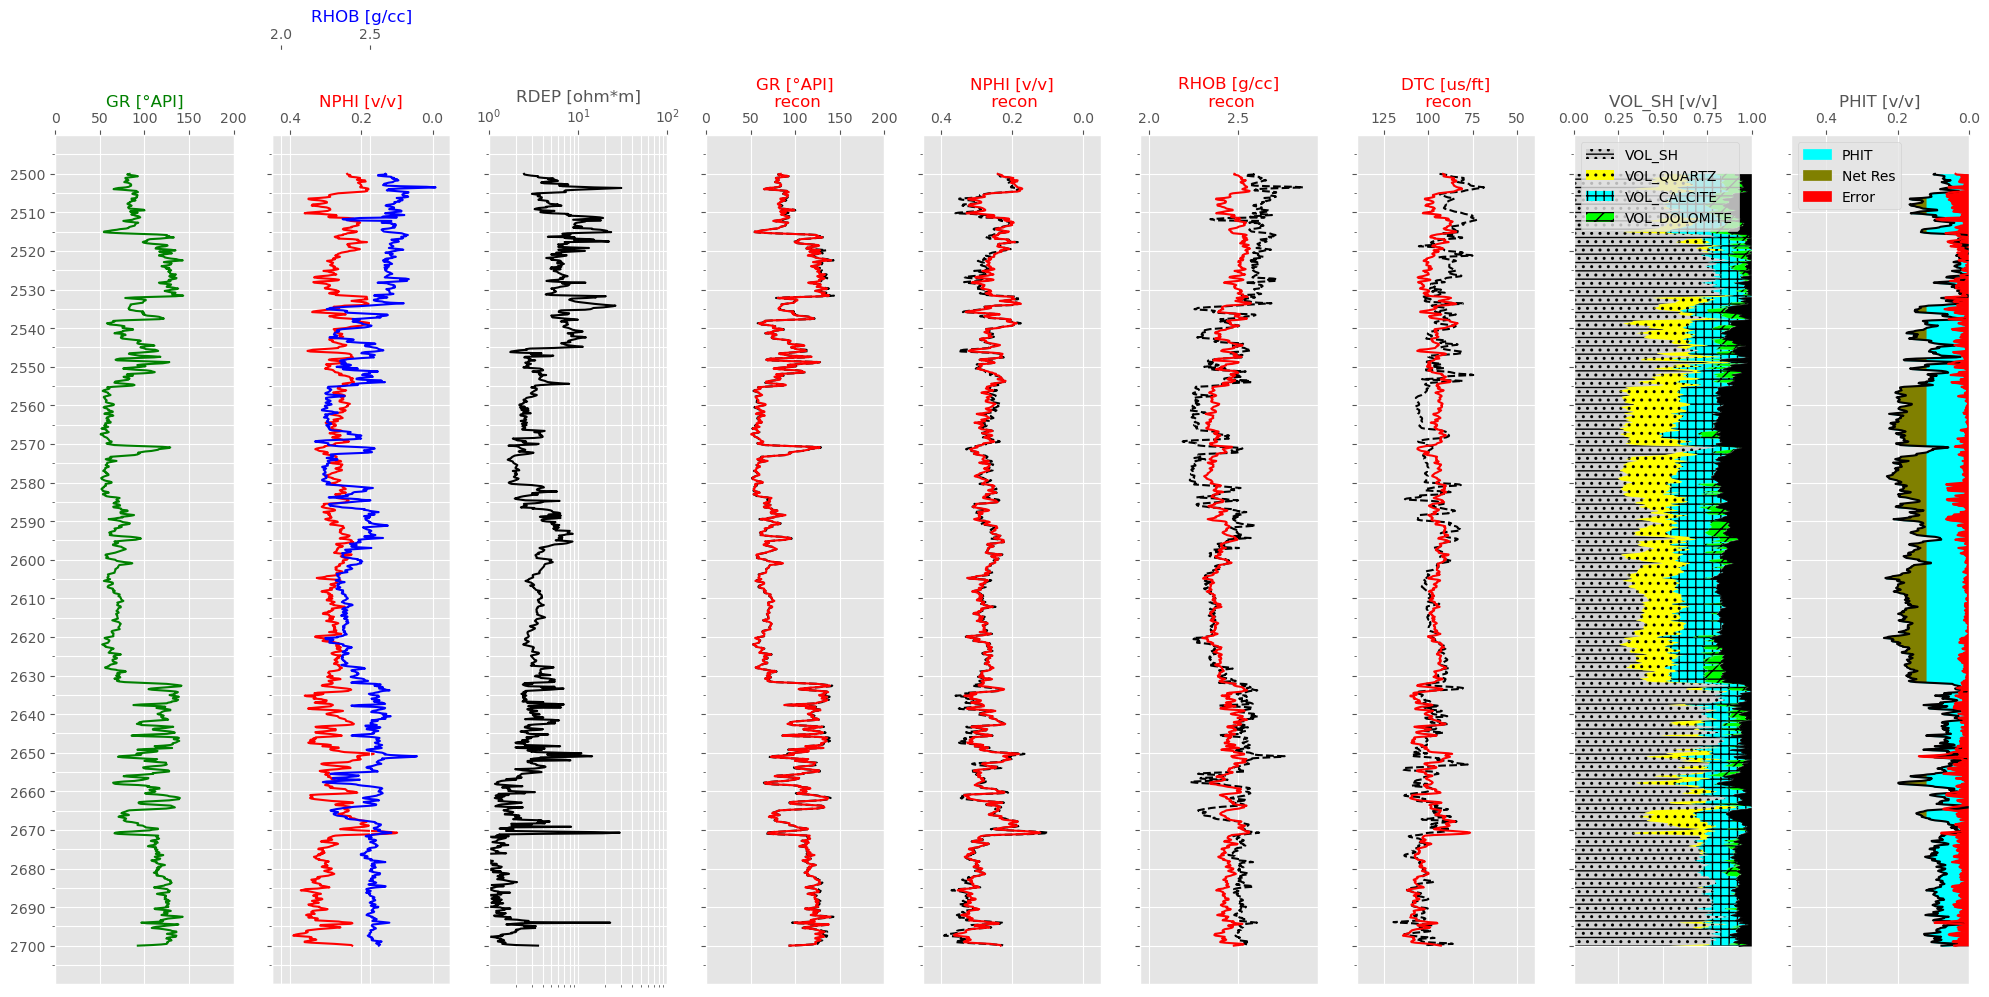

In [22]:
Plot()